In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
from tensorflow.keras.datasets import boston_housing

# Load the data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("Train Data: ", len(train_data))
print("Test Data: ", len(test_data))

Train Data:  404
Test Data:  102


The column names and a brief description of each:

CRIM: per capita crime rate by town.<br>
ZN: proportion of residential land zoned for lots over 25,000 sq. ft.<br>
INDUS: proportion of non-retail business acres per town.<br>
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).<br>
NOX: nitric oxides concentration (parts per 10 million).<br>
RM: average number of rooms per dwelling.<br>
AGE: proportion of owner-occupied units built prior to 1940.<br>
DIS: weighted distances to five Boston employment centers.<br>
RAD: index of accessibility to radial highways.<br>
TAX: full-value property tax rate per 10,000 dollar. <br>
PTRATIO: pupil-teacher ratio by town.<br>
LSTAT: percentage of lower status of the population.<br>
MEDV: median value of owner-occupied homes in $1000s. <br>

In [2]:
# Define column names
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Convert training data to a DataFrame for better visualization
train_df = pd.DataFrame(train_data, columns=column_names[:-1])
train_df['MEDV'] = train_targets

# Display the first few rows of the DataFrame
print(train_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  MEDV  
0     21.0  396.90  18.72  15.2  
1     14.7  395.38   3.11  42.3  
2     20.2  375.52   3.26  50.0  
3     20.2  396.90   8.01  21.1  
4     20.2  391.43  14.65  17.7  


In [3]:
# Normalize the data (this is important for neural networks)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Split the training data further into training and validation sets
train_data, val_data, train_targets, val_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)

In [4]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression
model.summary()

D:\Courses\6. Deep learning\deep_learning_practical\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_data, train_targets, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(val_data, val_targets))


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 579.3948 - val_accuracy: 0.0000e+00 - val_loss: 390.2076
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 494.8756 - val_accuracy: 0.0000e+00 - val_loss: 324.9288
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 425.1256 - val_accuracy: 0.0000e+00 - val_loss: 251.6104
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 301.0489 - val_accuracy: 0.0000e+00 - val_loss: 177.1450
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 220.4060 - val_accuracy: 0.0000e+00 - val_loss: 116.8960
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 139.4012 - val_accuracy: 0.0000e+00 - val_loss: 77.5631
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 86.6198 - val_accuracy: 0.0000e+00 - val_loss: 50.4441
Epoch 8/100
11/11 ━━━━━━━━━━━

In [7]:
# Evaluate the model
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(f"Test MSE: {test_mse_score}")
print(f"Test MAE: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 15.3006
Test MSE: 21.05721092224121
Test MAE: 0.0


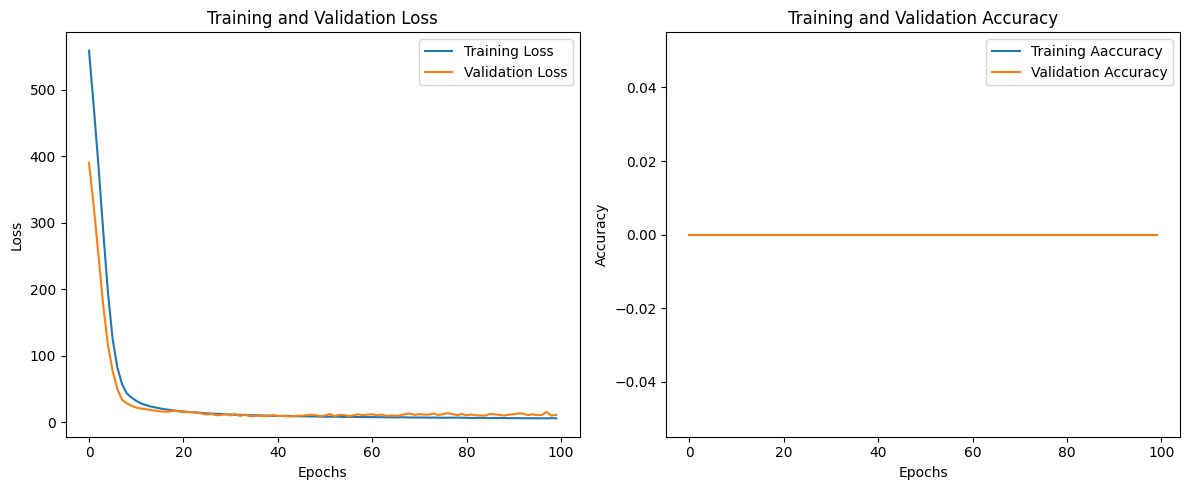

In [8]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Plot loss vs val_loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot mae vs val_mae
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Aaccuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np

# Assuming `scaler` and `model` are already defined and trained

# Example new data point (you should replace this with your actual data)
new_data_point = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                           1.1, 1.2, 1.3])  # Should have the same number of features as your training data

# Normalize the new data point using the same scaler
new_data_point_scaled = scaler.transform(new_data_point.reshape(1, -1))

# Make prediction
predicted_price = model.predict(new_data_point_scaled)

print(f"Predicted Price: {predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Price: 51.31


In [10]:
# Save the model
model.save('house_price_prediction_model.keras')

In [11]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
saved_model = load_model('house_price_prediction_model.keras')

# Example new data point (you should replace this with your actual data)
new_data_point = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                           1.1, 1.2, 1.3])  # Should have the same number of features as your training data

# Normalize the new data point using the same scaler
new_data_point_scaled = scaler.transform(new_data_point.reshape(1, -1))

# Make prediction using the loaded model
predicted_price = saved_model.predict(new_data_point_scaled)

print(f"Predicted Price: {predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Price: 51.31
